---
title: Perceptron Blog
author: Dean Smith
date: '2023-2-22'
image: "image.jpg"
description: "In this blog I build and implement a simple perceptron model"
format: html
---

# Perceptron

In the code cell below I import my data and packages use throughout this notebook including the source code perceptron.py that can be found using this link: https://github.com/dmsmith25/dmsmith25.github.io/blob/7eeef82cbf16398e0d0e9900e31df7dd50b99e12/posts/perceptron-project/perceptron.py

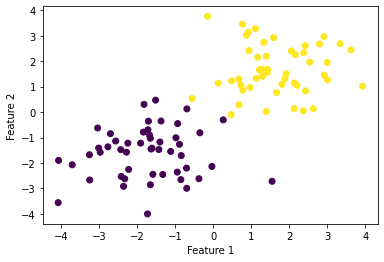

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from perceptron import Perceptron
from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3

# create dataset
X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")




In the cell below, I initialize an instance of the perceptron model as p. Additionally, I run the fit() function where the perceptron model inputs features and labels to then adjust its weights to classify any new points in the dataset.

In [2]:

p = Perceptron()
max_steps = 1000
p.fit(X, y, max_steps)

print(p.history[-10:])

[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0]


Here, I plot the accuracy of the perceptron model over its iterations

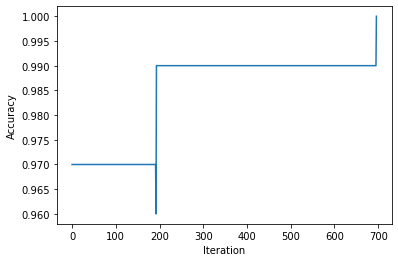

In [3]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

Below, I use a function to draw the line determined by the perceptron model to classify the purple and yellow points.

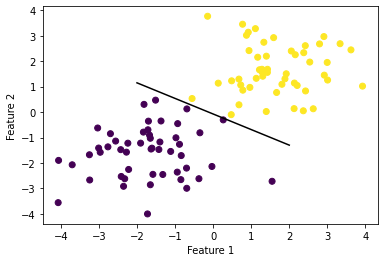

In [4]:
def draw_line(w, x_min, x_max,ax=None , style="solid"):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  if ax is None:
    if style == "solid":
      plt.plot(x, y, color = "black")
    if style == "dashed":
      plt.plot(x, y, "k--")
  else:
    ax.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Lastly, I check the score or accuracy of the model after fitting

In [5]:
p.score(X, y)

1.0

# Runtime Analysis

For each update of the perceptron, it will take O(p) runtime because the number of datapoints is irrelevant when talking about just a singular update. In each update, the runtime is dependant on the number of features or columns of the matricies being multiplied.